## Data Science Outlook
## Authors:
    Kathleen Freeberg
    Smita Sharma
    Sanheev Mankar
## Analysis of Job Locations and Industries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Open CSV files 

#Cleaned monster.com file: jobs.csv
jobs_csv_path=os.path.join("..","Cleaned Data", "jobs.csv")
jobs_data = pd.read_csv(jobs_csv_path)
jobs_data_df=pd.DataFrame(jobs_data)


In [3]:

#Cleaned Data Science jobs file: ds_jobs.csv
ds_jobs_csv_path=os.path.join("..","Cleaned Data",  "ds_jobs.csv")
ds_jobs_data = pd.read_csv(ds_jobs_csv_path)
ds_jobs_data_df=pd.DataFrame(ds_jobs_data)
ds_jobs_data_df.head()

,Unnamed: 0,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,state
0,244,United States of America,US,NaN,No,jobs.monster.com,business analyst job in santa cruz,business analyst job in santa cruz,NaN,"Santa Cruz, CA",Engineering,http://jobview.monster.com/Business-Analyst-Jo...,NaN,Engineering,5bfd3b75a363ed7f56ca0535686c2603,CA
1,324,United States of America,US,NaN,No,jobs.monster.com,business analyst job in las vegas,business analyst job in las vegas,Full Time Employee,"Las Vegas, NV",Technology,http://jobview.monster.com/business-analyst-jo...,NaN,Experienced (Non-Manager),0cfe8e1701c1cf62f02c27ea0e259616,NV
2,331,United States of America,US,NaN,No,jobs.monster.com,business analyst associate job in san francisco,business analyst associate job in san francisco,Full Time Temporary/Contract/Project,"San Francisco, CA 94108",Business/Strategic Management,http://jobview.monster.com/business-analyst-as...,NaN,Business/Strategic Management,3ea54cca80f6790bb99f6a3f82995585,CA
3,345,United States of America,US,NaN,No,jobs.monster.com,sr. business analyst job in omaha,sr. business analyst job in omaha,Full Time Employee,"Omaha, NE 68124",Business Services - Other,http://jobview.monster.com/sr-business-analyst...,NaN,Business/Strategic Management,85d369c3fc64c11b3856d8a636659ba4,NE
4,385,United States of America,US,NaN,No,jobs.monster.com,business analyst i job in oak brook,business analyst i job in oak brook,"Full Time, Temporary/Contract/Project","Oak Brook, IL 60521",Other/Not Classified,http://jobview.monster.com/business-analyst-i-...,NaN,Experienced (Non-Manager),21e316b856c704ea93decf447dc2c007,IL


In [4]:
#Get total number of job posts by state

job_location_df=pd.DataFrame(jobs_data_df["state"].value_counts())
job_location_df.reset_index(inplace=True)
job_location_df=job_location_df.rename(columns={"index":"State", "state":"N Jobs"})

job_location_df.head()


,State,N Jobs
0,TX,3189
1,OH,2372
2,CA,1715
3,PA,981
4,IL,890


In [5]:
#Get number of Data Science job posts by state

ds_job_location_df=pd.DataFrame(ds_jobs_data_df["state"].value_counts())
ds_job_location_df.reset_index(inplace=True)
ds_job_location_df=ds_job_location_df.rename(columns={"index":"State", "state":"N DS Jobs"})

ds_job_location_df.head()

,State,N DS Jobs
0,TX,58
1,OH,34
2,CA,14
3,GA,10
4,NJ,10


In [6]:
# Merge two dataframes using a right join
Jobs_DF = pd.merge(ds_job_location_df, job_location_df, on="State", how="right")

Jobs_DF["% Data Science"]=round(Jobs_DF['N DS Jobs']/Jobs_DF['N Jobs']*100, 1)
Jobs_DF=Jobs_DF.fillna(0)

Jobs_DF.head()

,State,N DS Jobs,N Jobs,% Data Science
0,TX,58.0,3189,1.8
1,OH,34.0,2372,1.4
2,CA,14.0,1715,0.8
3,GA,10.0,780,1.3
4,NJ,10.0,558,1.8


In [7]:
# Create a choropleth map show the Percent of jobs that are in Data Science (html file)

state_geo = os.path.join('..','Sources', 'us-states.json')
 
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=Jobs_DF,
 columns=['State', '% Data Science'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Data Science Jobs (%)'

)
folium.LayerControl().add_to(m)
 
# Save to html
csv_path=os.path.join("..","Output", "jobs_Per_chloropleth.html")
m.save(csv_path)



/anaconda3/envs/PythonData/lib/python3.7/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [8]:
# Create a choropleth map show the number of jobs that are in Data Science (html file)
state_geo = os.path.join('..','Sources', 'us-states.json')

m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=Jobs_DF,
 columns=['State', 'N DS Jobs'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Data Science Jobs (N)'

)
folium.LayerControl().add_to(m)
 
# Save to html
csv_path=os.path.join("..","Output", "jobs_N_chloropleth.html")
m.save(csv_path)

In [9]:
# Determin which industries are looking for Data Scientists

industry_df=pd.DataFrame(ds_jobs_data_df["organization"].value_counts())
industry_df.reset_index(inplace=True)

industry_df=industry_df.rename(columns={"index":"Industry", "organization":"N in Sector"})
industry_df.head()


,Industry,N in Sector
0,Technology,51
1,Other/Not Classified,44
2,Biotechnology/Pharmaceuticals,12
3,Manufacturing - Other,7
4,Financial Services,5


In [10]:
industry_summary_df=pd.DataFrame(industry_df.head(5))

totalDS=industry_summary_df['N in Sector'].sum()

industry_summary_df['Percent of Sector']=industry_summary_df['N in Sector']/totalDS*100

industry_summary_df['Percent of Sector']=industry_summary_df['Percent of Sector'].map("{:.1f}%".format)

industry_summary_df

,Industry,N in Sector,Percent of Sector
0,Technology,51,42.9%
1,Other/Not Classified,44,37.0%
2,Biotechnology/Pharmaceuticals,12,10.1%
3,Manufacturing - Other,7,5.9%
4,Financial Services,5,4.2%


In [11]:
top_five=industry_df.head(5)
top_five

,Industry,N in Sector
0,Technology,51
1,Other/Not Classified,44
2,Biotechnology/Pharmaceuticals,12
3,Manufacturing - Other,7
4,Financial Services,5


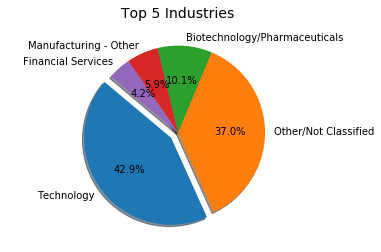

In [12]:
#Create a pie chart showing the top 5 industries




explode = (0.1,0,0,0,0)

plt.axis("equal")
plt.title("Top 5 Industries", fontsize=14)
plt.pie(top_five['N in Sector'], explode=explode,  autopct="%1.1f%%", labels=top_five['Industry'],
        shadow=True, startangle=140)

csv_path=os.path.join("..","Output", "Top 5 Industries.png")
plt.savefig(csv_path)